# Charts for Mathematical Modeling to Explore Shorter Multi-Drug Therapy Options for Active Pulmonary Tuberculosis

Natasha Strydom
20-12-2017

This document details the plots intended for publication of the manuscript "Mathematical Modeling to Explore Shorter Multi-Drug Therapy Options for Active Pulmonary Tuberculosis" primarily authored by John Fors.

Data files were acquired by J Fors from the Systems Pharmacology Model established and implemented in C++ by J Fors.


Figure notation follow that of the final manuscript. All plots were saved as pdf files and imported in Adobe Illustrator for final cleanup and improved legends and exported as .png files at x4 resolution.


In [3]:
library(dplyr)        #data wrangling
library(ggplot2)      #data plotting
library(ggthemes)     #improve plot aesthetics
library(tidyr)        #gather function for multiple columns
library(zoo)          #useful merge and nalocf function
library(gridExtra)    #arrange multiple grid-based plots on a page


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



### Porterfield color theme for charts
Color blind friendly theme using dark grey, red, blue, yellow and dark blue:

In [2]:
porterfield <- c('#ca222c',  # red
                 '#22a6d6',  # blue
                 '#484848',  # dark grey
                 '#ffca63',  # yellow
                 '#2c7bb6')  # dark blue

## **Original Charts Revisited**

## Chart 1 - No Treatment


### Importing and cleaning data
Data outputs for publication were saved as .csv files and consist of single columns for intracellular (B1) and extracellular (B2) and their respective q1 and q3 when no treatment is on board. Each row is equal to 1 hour.

Reading files:

In [15]:
file1 <- data.frame(B1 = scan('~/Dropbox/John_manuscript/Figure 2/Bt_I_mN.txt', skip=1, what = numeric(), sep = '\t'))
file2 <- data.frame(B1q1 = scan('~/Dropbox/John_manuscript/Figure 2/Bt_I_q1N.txt', skip=1, what = numeric(), sep = '\t'))
file3 <- data.frame(B1q3 = scan('~/Dropbox/John_manuscript/Figure 2/Bt_I_q3N.txt', skip=1, what = numeric(), sep = '\t'))
file4 <- data.frame(B2 = scan('~/Dropbox/John_manuscript/Figure 2/Bt_II_mN.txt', skip=1, what = numeric(), sep = '\t'))
file5 <- data.frame(B2q1 = scan('~/Dropbox/John_manuscript/Figure 2/Bt_II_q1N.txt', skip=1, what = numeric(), sep = '\t'))
file6 <- data.frame(B2q3 = scan('~/Dropbox/John_manuscript/Figure 2/Bt_II_q3N.txt', skip=1, what = numeric(), sep = '\t'))

In [16]:
a <- bind_cols(file1, file2, file3, file4, file5, file6)
a <- a %>% 
  mutate(time = seq(0, 600, by = 1)) %>% 
  select(time, B1, B1q1, B1q3, B2, B2q1, B2q3)

In [17]:
a

time,B1,B1q1,B1q3,B2,B2q1,B2q3
0,14.990800,10.519100,20.82960,79.6341,66.7077,92.690
1,0.837678,0.587802,1.25574,100.0000,85.9144,116.395
2,0.837678,0.618314,1.13487,107.8860,92.6900,122.437
3,0.926900,0.684171,1.22437,113.4870,97.5014,132.093
4,1.000000,0.738128,1.32093,122.4370,102.5630,138.950
5,1.078860,0.796341,1.42510,128.7920,110.6510,149.908
6,1.163950,0.859144,1.53749,135.4780,116.3950,157.689
7,1.224370,0.903741,1.65875,142.5100,122.4370,165.875
8,1.320930,0.975014,1.74485,149.9080,128.7920,174.485
9,1.389500,1.025630,1.88246,161.7300,135.4780,188.246


Warning message:
“Removed 1 rows containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_path).”

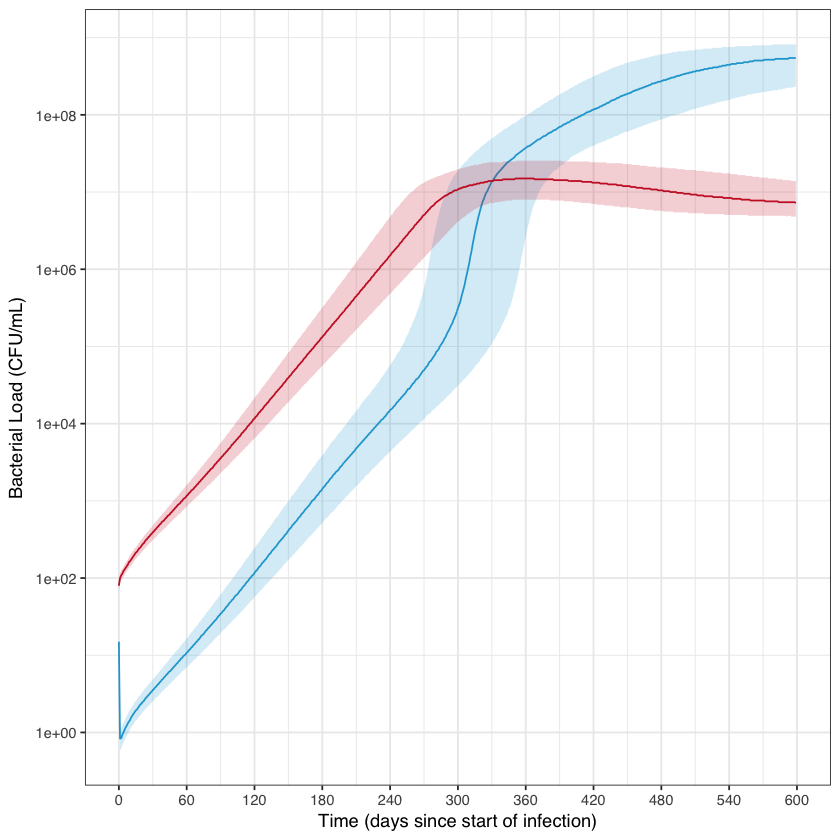

In [19]:
Plot1 <- ggplot(a, aes(time, B1)) +
  geom_ribbon(aes(ymin = B1q1, ymax = B1q3), alpha = 0.2, fill = "#21a6d5", size = 0.01) +
  geom_line(color = "#21a6d5") +
    geom_ribbon(aes(ymin = B2q1, ymax = B2q3), alpha = 0.2, fill = "#ca222c", size = 0.01) +
  geom_line(data = a, aes(time, B2), color = "#ca222c") +
  scale_y_log10(breaks = c(1, 10^2, 1e+4, 1e+6, 1e+8)) +
  ylab("Bacterial Load (CFU/mL)") +
  xlab("Time (days since start of infection)") +
  scale_x_continuous(limits = c(0, 600), breaks = seq(0, 600, by = 60)) +
  theme_bw(base_family = "Helvetica") +
  theme(legend.position = 'none')

Plot1

## Chart 2

Warning message:
“Removed 5750 rows containing missing values (geom_path).”Warning message:
“Removed 575 rows containing missing values (geom_path).”

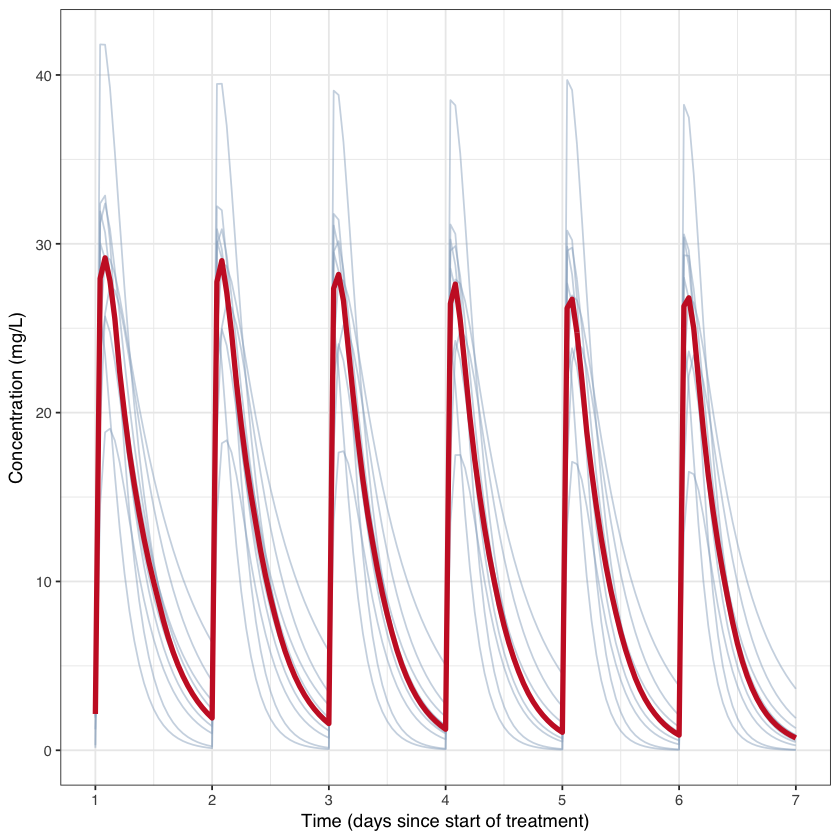

In [11]:
file7 <- read.table('~/Dropbox/John_manuscript/Figure 3/CalcCII2.csv', header = TRUE, sep = ',')

file7 <- mutate(file7, time = seq(1, 720, by = 1), days = time/24)

b <- gather(file7, patient, Conc, 1:10)

c <- b %>% 
  group_by(patient) %>% 
  summarise(cmax = max(Conc)) %>% 
  inner_join(b, by ='patient') %>% 
  arrange(cmax)

d <- b %>% 
  group_by(days) %>% 
  summarise(med = median(Conc))

c$patient <- factor(c$patient, c("p6", "p5", "p2", "p3", "p7", "p1", "p8", 'p10', 'p9', 'p4'))





Plot2 <- ggplot(c, aes(days, Conc, group = patient, color = patient)) +
  geom_line(alpha = 0.5, size = 0.5, color = "#98AFC7") +
  geom_line(data = d, aes(x = days, y = med, group = NULL),
            colour = "#ca222c", size = 1.5) +
  #scale_y_log10() +
  ylab("Concentration (mg/L)") +
  xlab("Time (days since start of treatment)") +
  scale_x_continuous(limits = c(1, 7), breaks = c(1, 2, 3, 4, 5, 6, 7)) +
  theme_bw(base_family = "Helvetica") +
  theme(legend.position = 'none')

Plot2

## Chart 3

ERROR while rich displaying an object: Error in f(...): object 'porterfield' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. lapply(data, scales_map_df, scales = 

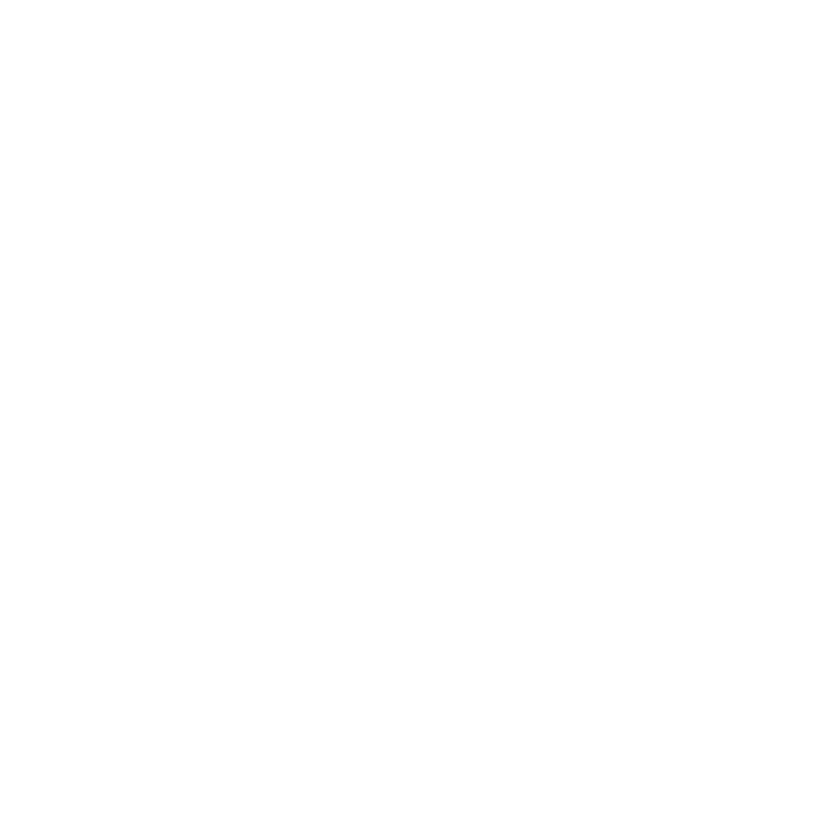

In [10]:
file8 <- data.frame(Conc = scan('~/Dropbox/John_manuscript/Figure 4/concIDrug0_m.txt', skip=1, what = numeric(), sep = '\t'))
file9 <- data.frame(Conc = scan('~/Dropbox/John_manuscript/Figure 4/concIDrug1_m.txt', skip=1, what = numeric(), sep = '\t'))
file10 <- data.frame(Conc = scan('~/Dropbox/John_manuscript/Figure 4/concIDrug2_m.txt', skip=1, what = numeric(), sep = '\t'))
file11 <- data.frame(Conc = scan('~/Dropbox/John_manuscript/Figure 4/concIDrug3_m.txt', skip=1, what = numeric(), sep = '\t'))
file12 <- data.frame(Conc = scan('~/Dropbox/John_manuscript/Figure 4/concIIDrug0_m.txt', skip=1, what = numeric(), sep = '\t'))
file13 <- data.frame(Conc = scan('~/Dropbox/John_manuscript/Figure 4/concIIDrug1_m.txt', skip=1, what = numeric(), sep = '\t'))
file14 <- data.frame(Conc = scan('~/Dropbox/John_manuscript/Figure 4/concIIDrug2_m.txt', skip=1, what = numeric(), sep = '\t'))
file15 <- data.frame(Conc = scan('~/Dropbox/John_manuscript/Figure 4/concIIDrug3_m.txt', skip=1, what = numeric(), sep = '\t'))

file8 <- file8 %>% 
  mutate(Drug = "PZA", 
         CPT = "Extra",
         time = seq(0, 720, by = 1), 
         days = time/24)
file9 <- file9 %>% 
  mutate(Drug = "INH", 
         CPT = "Extra",
         time = seq(0, 720, by = 1), 
         days = time/24)
file10 <- file10 %>% 
  mutate(Drug = "RMP", 
         CPT = "Extra",
         time = seq(0, 720, by = 1), 
         days = time/24)
file11 <- file11 %>% 
  mutate(Drug = "EMB", 
         CPT = "Extra",
         time = seq(0, 720, by = 1), 
         days = time/24)

file12 <- file12 %>% 
  mutate(Drug = "PZA", 
         CPT = "Intra",
         time = seq(0, 720, by = 1), 
         days = time/24)
file13 <- file13 %>% 
  mutate(Drug = "INH", 
         CPT = "Intra",
         time = seq(0, 720, by = 1), 
         days = time/24)
file14 <- file14 %>% 
  mutate(Drug = "RMP", 
         CPT = "Intra",
         time = seq(0, 720, by = 1), 
         days = time/24)
file15 <- file15 %>% 
  mutate(Drug = "EMB", 
         CPT = "Intra",
         time = seq(0, 720, by = 1), 
         days = time/24)


e <- bind_rows(file8, file9, file10, file11, file12, file13, file14, file15)

Plot3 <- ggplot(e, aes(days, Conc, color = CPT)) +
  geom_line() +
  #scale_y_log10() +                                                   #option to log-scale
  ylab("Concentraion (mg/L)") +
  xlab("Time (days)") +
  scale_color_manual(values = porterfield) +
  scale_x_continuous(limits = c(0, 14), breaks = c(0, 2,4,6,8,10,12,14)) +
  theme_bw(base_family = "Helvetica") +
  facet_grid(Drug~CPT, scales = "free_y") +
  theme(legend.position = 'none')

Plot3

## Chart 4

Warning message:
“Removed 1 rows containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_path).”

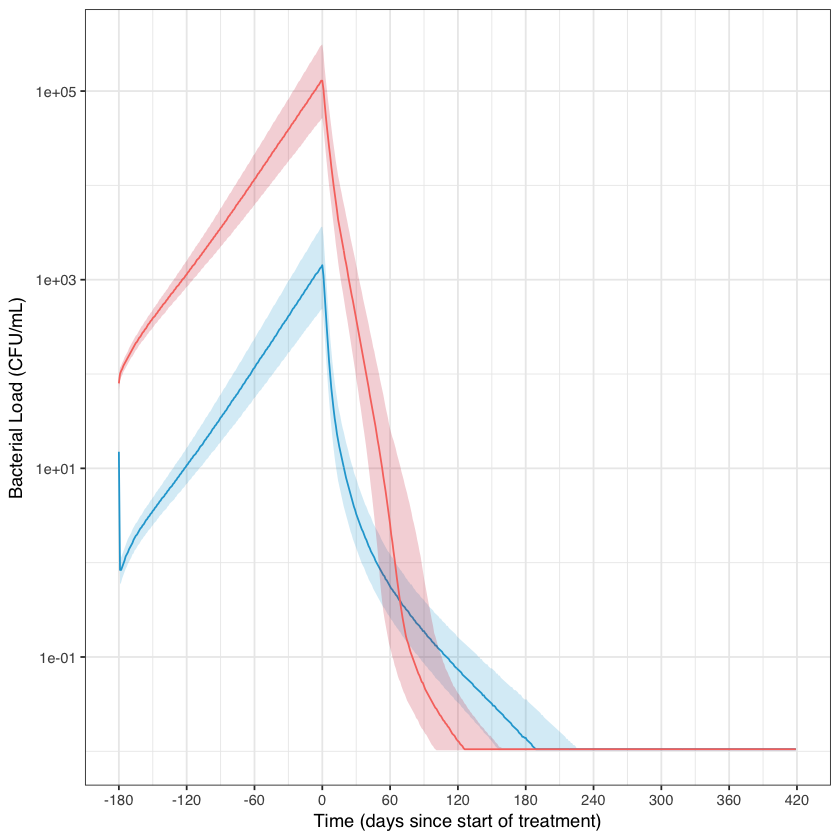

In [4]:
file16 <- data.frame(B1 = scan("~/Dropbox/John_manuscript/Data/Figure5/Bt_I_m.txt", skip=1, what = numeric(), sep = '\t'))
file17 <- data.frame(B1q1 = scan('~/Dropbox/John_manuscript/Data/Figure5/Bt_I_q1.txt', skip=1, what = numeric(), sep = '\t'))
file18 <- data.frame(B1q3 = scan('~/Dropbox/John_manuscript/Data/Figure5/Bt_I_q3.txt', skip=1, what = numeric(), sep = '\t'))
file19 <- data.frame(B2 = scan('~/Dropbox/John_manuscript/Data/Figure5/Bt_II_m.txt', skip=1, what = numeric(), sep = '\t'))
file20 <- data.frame(B2q1 = scan('~/Dropbox/John_manuscript/Data/Figure5/Bt_II_q1.txt', skip=1, what = numeric(), sep = '\t'))
file21 <- data.frame(B2q3 = scan('~/Dropbox/John_manuscript/Data/Figure5/Bt_II_q3.txt', skip=1, what = numeric(), sep = '\t'))

a2 <- bind_cols(file16, file17, file18, file19, file20, file21)

a2 <- mutate(a2, time = seq(-180, 420, by = 1))

Plot4 <- ggplot(a2, aes(time, B1)) +
  geom_ribbon(aes(ymin = B1q1, ymax = B1q3), alpha = 0.2, fill = "#21a6d5", size = 0.01) +
  geom_line(color = "#21a6d5") +
  geom_ribbon(aes(ymin = B2q1, ymax = B2q3), alpha = 0.2, fill = "#ca222c", size = 0.01) +
  geom_line(data = a2, aes(time, B2, color = "#ca222c")) +
  scale_y_log10() +
  ylab("Bacterial Load (CFU/mL)") +
  xlab("Time (days since start of treatment)") +
  scale_x_continuous(limits = c(-180, 420), breaks = seq(-180, 420, by = 60)) +
  theme_bw(base_family = "Helvetica") +
  theme(legend.position = 'none')

Plot4

## Chart 5

Warning message:
“Removed 1 rows containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_path).”

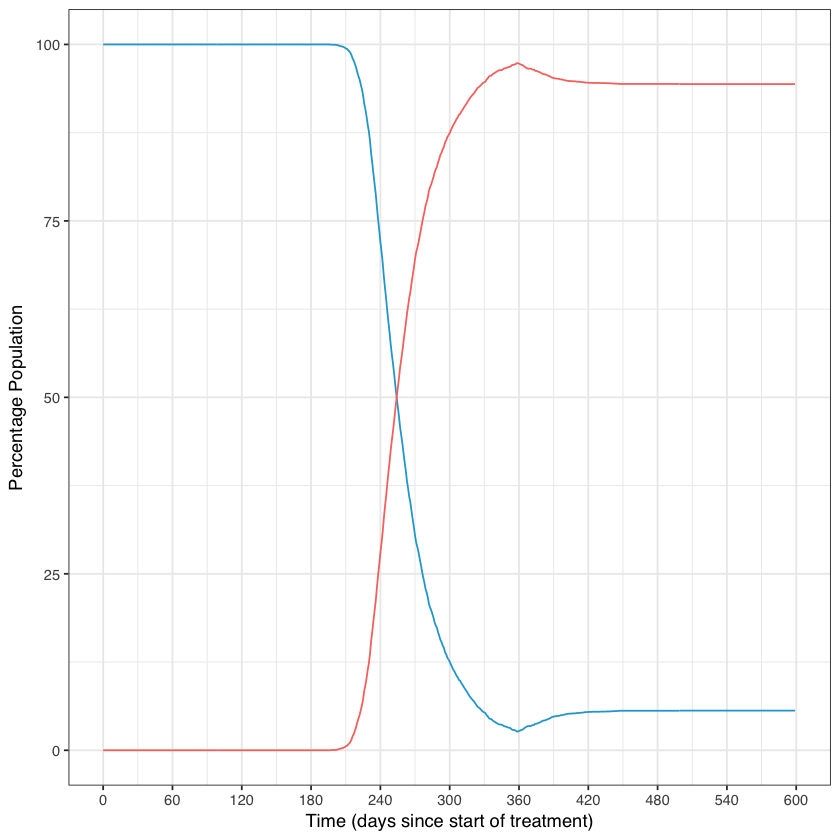

In [5]:
file22 <- data.frame(AcuteTB = scan('~/Dropbox/John_manuscript/Figure 6/countAcuteTB.txt', skip=1, what = numeric(), sep = '\t'))
file23 <- data.frame(ClearedTB = scan('~/Dropbox/John_manuscript/Figure 6/countClearedTB.txt', skip=1, what = numeric(), sep = '\t'))

g <- bind_cols(file22, file23)

g <- mutate(g, time = seq(0, 600, by = 1))

Plot5 <- ggplot(g, aes(time, AcuteTB*100)) +
  geom_line(color = "#21a6d5") +
  geom_line(data = g, aes(time, ClearedTB*100, color = "#ca222c")) +
  #scale_y_log10() +
  ylab("Percentage Population) +
  xlab("Time (days since start of treatment)") +
  scale_x_continuous(limits = c(0, 600), breaks = seq(0, 600, by = 60)) +
  theme_bw(base_family = "Helvetica") +
  theme(legend.position = 'none')

Plot5

## Chart 6

Warning message:
“Removed 1 rows containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_path).”

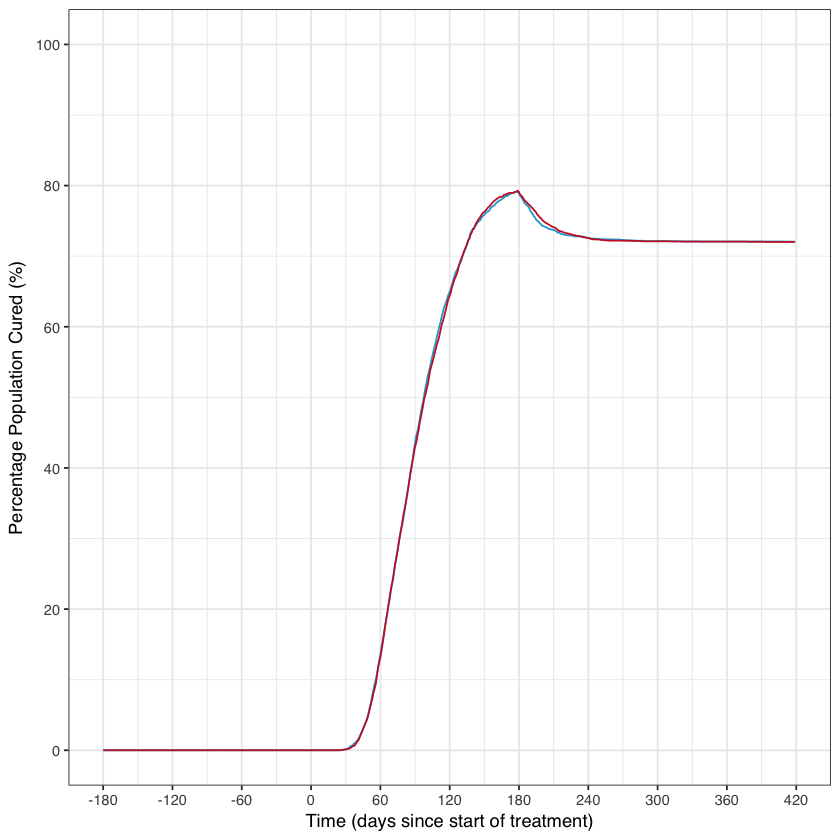

In [9]:
file24 <- data.frame(TB1 = scan('~/Dropbox/John_manuscript/Figure 7/countClearedTB1.txt', skip = 1, what = numeric(), sep = '\t'))
file25 <- data.frame(TB2 = scan('~/Dropbox/John_manuscript/Figure 7/countClearedTB2.txt', skip = 1, what = numeric(), sep = '\t'))

h <- bind_cols(file24, file25)

h <- mutate(h, time = seq(-180, 420, by = 1))

Plot6 <- ggplot(h, aes(time, TB1*100)) +
  geom_line(color = "#21a6d5") +
  geom_line(data = h, aes(time, TB2*100), color = "#ca222c") +
  #scale_y_log10() +
  ylab("Percentage Population Cured (%)") +
  xlab("Time (days since start of treatment)") +
  scale_x_continuous(limits = c(-180, 420), breaks = seq(-180, 420, by = 60)) +
  scale_y_continuous(limits = c(0, 100), breaks = seq(0, 100, by = 20)) +
  theme_bw(base_family = "Helvetica") +
  theme(legend.position = 'none')

Plot6

## Chart 7

Warning message:
“Removed 1 rows containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_path).”

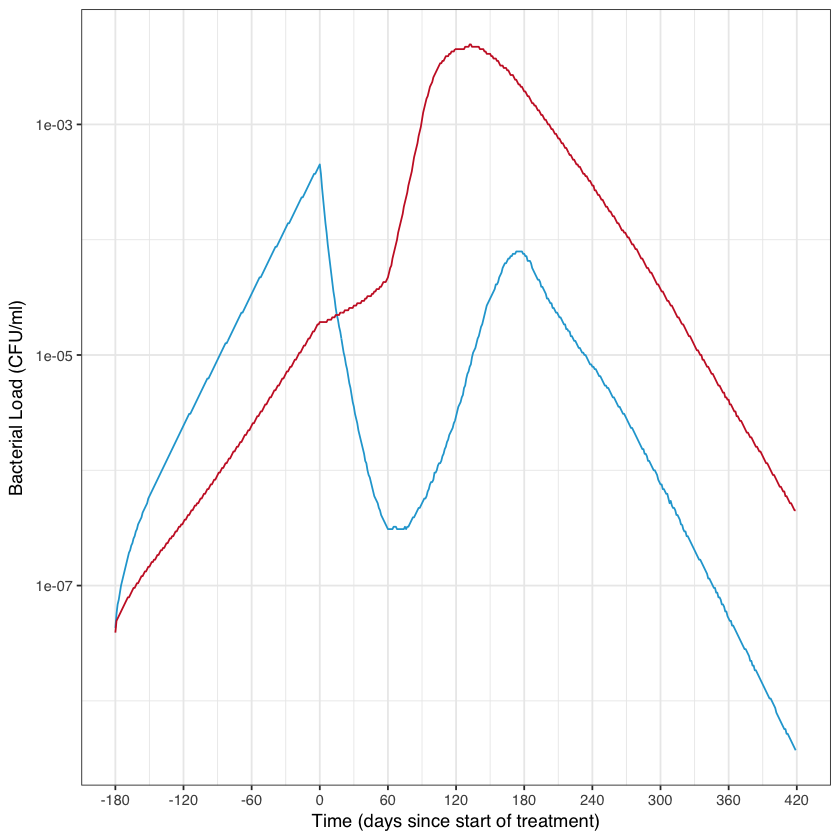

In [8]:
file26 <- data.frame(Br1_1 = scan('~/Dropbox/John_manuscript/Figure 8/Br1_I_m1.txt', skip = 1, what = numeric(), sep = '\t'))
file27 <- data.frame(Br1_2 = scan('~/Dropbox/John_manuscript/Figure 8/Br1_II_m1.txt', skip = 1, what = numeric(), sep = '\t'))
file28 <- data.frame(Br1_3 = scan('~/Dropbox/John_manuscript/Figure 8/Br1_I_m2.txt', skip = 1, what = numeric(), sep = '\t'))
file29 <- data.frame(Br1_4 = scan('~/Dropbox/John_manuscript/Figure 8/Br1_II_m2.txt', skip = 1, what = numeric(), sep = '\t'))

i <- bind_cols(file26, file27, file28, file29)

i <- mutate(i, time = seq(-180, 420, by = 1))




Plot7 <- ggplot(i, aes(time, Br1_2)) +
  geom_line(color = "#21a6d5") +
  geom_line(data = i, aes(time, Br1_4),color = "#ca222c") +
  #scale_y_log10() +
  ylab("Bacterial Load (CFU/ml)") +
  xlab("Time (days since start of treatment)") +
  scale_x_continuous(limits = c(-180, 420), breaks = seq(-180, 420, by = 60)) +
  scale_y_log10() +
  theme_bw(base_family = "Helvetica") +
  theme(legend.position = 'none')

Plot7

## Chart 8 

Warning message:
“Removed 181 rows containing missing values (geom_path).”Warning message:
“Removed 181 rows containing missing values (geom_path).”Warning message:
“Removed 180 rows containing missing values (geom_path).”Warning message:
“Removed 181 rows containing missing values (geom_path).”Warning message:
“Removed 181 rows containing missing values (geom_path).”

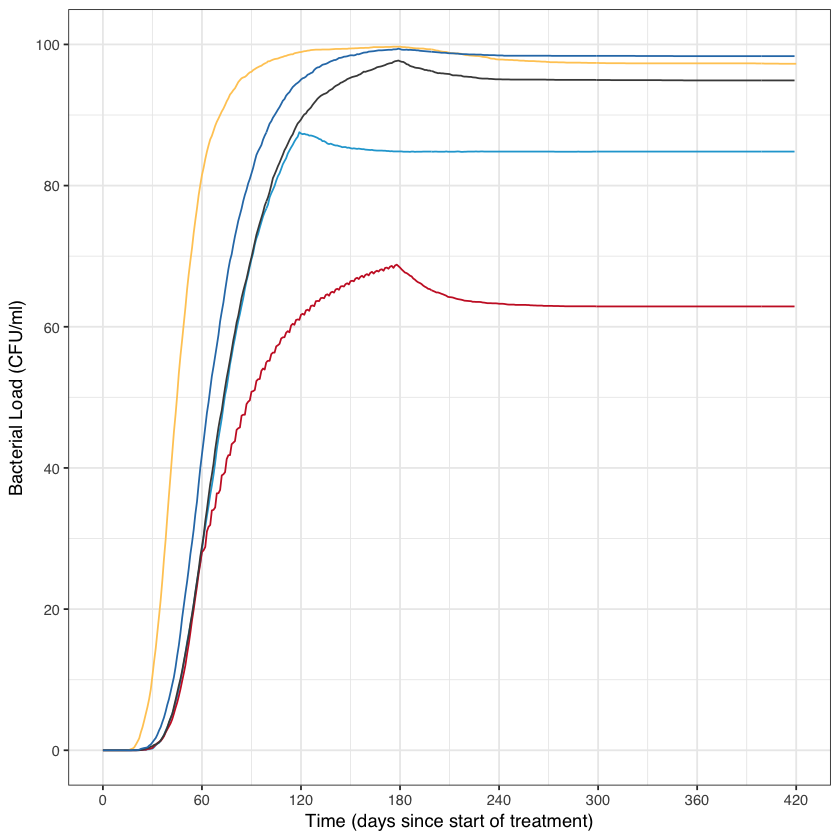

In [6]:
file30 <- data.frame(TB8 = scan('~/Dropbox/John_manuscript/Figure 9/countClearedTB8.txt', skip = 1, what = numeric(), sep = '\t'))
file31 <- data.frame(TB5 = scan('~/Dropbox/John_manuscript/Figure 9/countClearedTB5.txt', skip = 1, what = numeric(), sep = '\t'))
file32 <- data.frame(TB4 = scan('~/Dropbox/John_manuscript/Figure 9/countClearedTB4.txt', skip = 1, what = numeric(), sep = '\t'))
file33 <- data.frame(TB1 = scan('~/Dropbox/John_manuscript/Figure 9/countClearedTB1.txt', skip = 1, what = numeric(), sep = '\t'))
file34 <- data.frame(TB3 = scan('~/Dropbox/John_manuscript/Figure 9/countClearedTB3.txt', skip = 1, what = numeric(), sep = '\t'))

j <- bind_cols(file30, file31, file32, file33, file34)

j <- mutate(j, time = seq(-180, 420, by = 1))



Plot8 <- ggplot(j, aes(time, TB8*100)) +
  geom_line(color = "#21a6d5") +
  geom_line(data = j, aes(time, TB5*100),color = "#ca222c") +
  geom_line(data = j, aes(time + 90, TB4*100),color = "#ffca63") +
  geom_line(data = j, aes(time, TB1*100),color = "#484848") +
  geom_line(data = j, aes(time, TB3*100),color = "#2c7bb6") +
  scale_y_continuous(limits = c(0, 100), breaks = c(0, 20, 40, 60, 80, 100)) +
  ylab("Bacterial Load (CFU/ml)") +
  xlab("Time (days since start of treatment)") +
  scale_x_continuous(limits = c(0, 420), breaks = seq(-180, 420, by = 60)) +
  theme_bw(base_family = "Helvetica") +
  theme(legend.position = 'none')

Plot8

## Chart 9

Warning message:
“Removed 181 rows containing missing values (geom_path).”Warning message:
“Removed 181 rows containing missing values (geom_path).”Warning message:
“Removed 181 rows containing missing values (geom_path).”

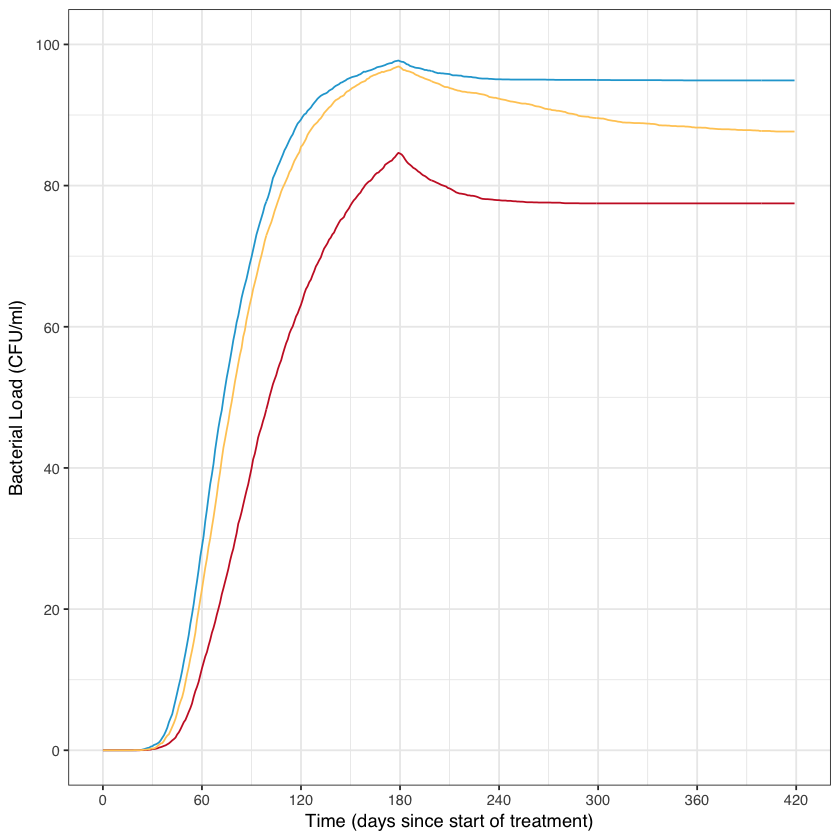

In [7]:
file35 <- data.frame(TB7 = scan('~/Dropbox/John_manuscript/Figure 10/countClearedTB7.txt', skip = 1, what = numeric(), sep = '\t'))
file36 <- data.frame(TB6 = scan('~/Dropbox/John_manuscript/Figure 10/countClearedTB6.txt', skip = 1, what = numeric(), sep = '\t'))
file37 <- data.frame(TB1 = scan('~/Dropbox/John_manuscript/Figure 10/countClearedTB1.txt', skip = 1, what = numeric(), sep = '\t'))

k <- bind_cols(file35, file36, file37)

k <- mutate(k, time = seq(-180, 420, by = 1))



Plot9 <- ggplot(k, aes(time, TB1*100)) +
  geom_line(color = "#21a6d5") +
  geom_line(data = k, aes(time, TB6*100),color = "#ca222c") +
  geom_line(data = k, aes(time, TB7*100),color = "#ffca63") +
  scale_y_continuous(limits = c(0, 100), breaks = c(0, 20, 40, 60, 80, 100)) +
  ylab("Bacterial Load (CFU/ml)") +
  xlab("Time (days since start of treatment)") +
  scale_x_continuous(limits = c(0, 420), breaks = seq(0, 420, by = 60)) +
  theme_bw(base_family = "Helvetica") +
  theme(legend.position = 'none')

Plot9